#🧪 PCA Practical: Dimensionality Reduction with Synthetic Data

🎯 Objective:

To reduce feature dimensionality using Principal Component Analysis (PCA) and visualize how much variance each component explains.

#✅ Step 1: Import Required Libraries

In [81]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For synthetic data and PCA
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


#✅ Step 2: Generate Synthetic Dataset

In [82]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic classification dataset with 10 features (some redundant)
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=3,
                           n_classes=2,
                           random_state=42)

# Convert to DataFrame for inspection
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
df['Target'] = y

# Display first few rows
df.head()



,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.832566,3.984819,1.371106,-0.566705,-0.942890,2.277278,-0.599821,3.790909,2.856752,-1.184140,1
1,-1.369035,0.231141,1.802292,-0.032047,-1.136737,0.651840,0.033525,3.660358,-1.237293,1.790979,1
2,2.830853,-1.946436,-1.881707,-0.161955,1.611247,0.064322,0.438413,-2.520883,-1.355660,1.555376,0
3,-2.775746,-1.035596,1.387249,0.061883,1.157426,-1.201067,-0.927553,-2.798974,-3.356626,-0.318152,0
4,-0.908299,2.494992,1.265136,-0.981326,-0.222445,0.275819,-1.404817,1.276871,2.433687,-1.909264,1


#✅ Step 3: Standardize Features Before PCA

In [83]:
# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Standardizing is necessary for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#✅ Step 4: Apply PCA

In [84]:
# Fit PCA to the scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio per component
explained_var = pca.explained_variance_ratio_
print("✅ Explained variance by each principal component:\n", explained_var)


✅ Explained variance by each principal component:
 [2.80388696e-01 2.05201698e-01 1.34672372e-01 1.03779385e-01
 9.81596810e-02 9.09396646e-02 8.68585041e-02 1.83600494e-17
 0.00000000e+00 0.00000000e+00]


#✅ Step 5: Plot Explained Variance (Scree Plot)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


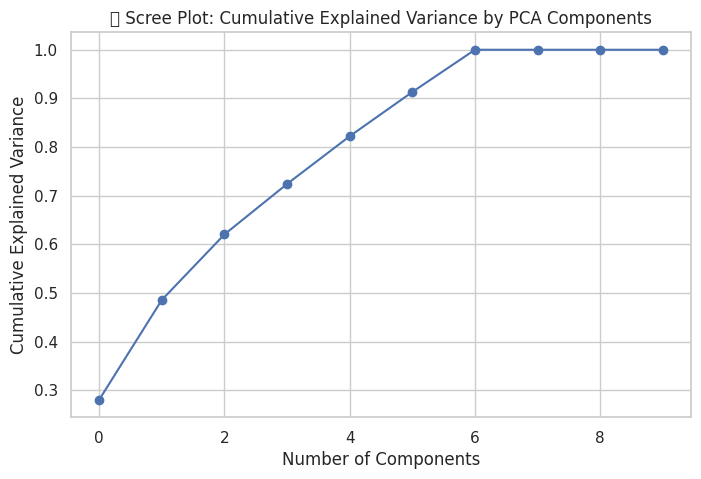

In [85]:
# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('📉 Scree Plot: Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()


#🎯 Goal: Select number of components that explain ~90–95% variance.

#✅ Step 6: Reduce Dimensionality to N Components (e.g., 2)

In [86]:
# Reducing to 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Combine with target for visualization
pca_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df['Target'] = y


#✅ Step 7: Visualize 2D PCA Projection

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


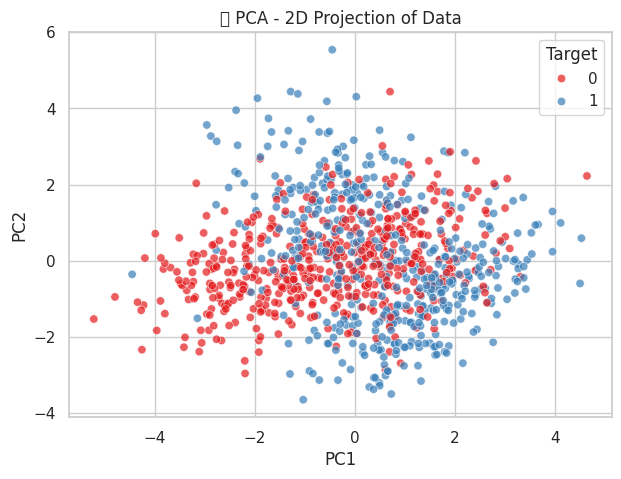

In [87]:
# Scatter plot of 2D PCA components colored by class
plt.figure(figsize=(7, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='Set1', alpha=0.7)
plt.title('🔍 PCA - 2D Projection of Data')
plt.grid(True)
plt.show()


#✅ Step 8: Train Classifier on Reduced Dimensions

In [88]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

# Fit Random Forest on reduced features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("🎯 Accuracy on PCA-reduced data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


🎯 Accuracy on PCA-reduced data: 0.75
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       101
           1       0.76      0.73      0.74        99

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



#📘 Notes for Students:

| Concept                     | Why It’s Important                                     |
| --------------------------- | ------------------------------------------------------ |
| `StandardScaler()`          | PCA works best when features are on the same scale     |
| `PCA(n_components=2)`       | Helps reduce noise and visualize high-dimensional data |
| `explained_variance_ratio_` | Tells you how much information (variance) is preserved |
